# **Modelo Predictivo de Bitcoin**

## Importando Librerias





In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Lectura del DataFrame

Saca de los comentarios la opción que prefieras.

### **Opción 1:**
Ingresar por medio de Kagglehub. Esto es posible si obtienes las credenciales desde las opciones de Kaggle y las ingresas al momento de ejecutarlo las siguientes líneas de código comentareadas.

In [ ]:
!pip install kagglehub

**Credenciales:**

User: susanarost

key: 9633ccec6d40619257a4dbb2caf98970

In [3]:
import kagglehub
kagglehub.login()

In [4]:
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data/versions/282") #Aclaramos la versión a la que nos interesa acceder
print("Path to dataset files:", path)

Path to dataset files: C:\Users\davie\.cache\kagglehub\datasets\mczielinski\bitcoin-historical-data\versions\282


In [ ]:
df_original = pd.read_csv("")
df = df_original.copy()
df

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
7093161,1.751071e+09,107128.00,107165.00,107128.00,107142.00,0.160983
7093162,1.751071e+09,107148.00,107148.00,107147.00,107147.00,0.002302
7093163,1.751071e+09,107147.00,107147.00,107147.00,107147.00,0.008469
7093164,1.751072e+09,107147.00,107148.00,107147.00,107148.00,0.003250


### **Opción 2:**
Manera Tradicional de importar el dataset


In [42]:
df_original = pd.read_csv(r"C:\PythonProjects\IA-TalentoTech\Proyecto\btcusd_1-min_data.csv")
df = df_original.copy()
df

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
7098923,1.751417e+09,105647.00,105647.00,105623.00,105623.00,0.068872
7098924,1.751417e+09,105621.00,105621.00,105618.00,105618.00,0.054222
7098925,1.751417e+09,105584.00,105584.00,105539.00,105539.00,0.080127
7098926,1.751417e+09,105539.00,105539.00,105484.00,105484.00,0.071111


## Análisis exploratorio de los datos

In [43]:
#Verificando cantidad de datos nulos
df.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [44]:
# Descripcion Estadistica
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.098928e+06,7.098928e+06,7.098928e+06,7.098928e+06,7.098928e+06,7.098928e+06
mean,1.538381e+09,1.848634e+04,1.849344e+04,1.847903e+04,1.848634e+04,5.245299e+00
std,1.229596e+08,2.578990e+04,2.579777e+04,2.578184e+04,2.578988e+04,2.238714e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.431896e+09,4.299600e+02,4.300000e+02,4.297500e+02,4.299600e+02,1.794000e-02
50%,1.538380e+09,6.751300e+03,6.755410e+03,6.747590e+03,6.751010e+03,4.541792e-01
75%,1.644864e+09,2.836000e+04,2.836800e+04,2.835100e+04,2.836000e+04,3.000000e+00
max,1.751417e+09,1.119930e+05,1.120000e+05,1.119670e+05,1.119750e+05,5.853852e+03


In [45]:
# Columnas del dataset
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [46]:
# Tamaño del dataset
df.shape

(7098928, 6)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7098928 entries, 0 to 7098927
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 325.0 MB


In [48]:
#Verificando si hay datos nulos
df.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

## Limpieza de datos

### Creación de nuevas columnas (date y hour)

In [49]:
df["Datetime"] = pd.to_datetime(df["Timestamp"], unit="s")
df["Date"] = df["Datetime"].dt.date
df["Hour"] = df["Datetime"].dt.hour

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7098928 entries, 0 to 7098927
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  float64       
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     float64       
 6   Datetime   datetime64[ns]
 7   Date       object        
 8   Hour       int32         
dtypes: datetime64[ns](1), float64(6), int32(1), object(1)
memory usage: 460.4+ MB


### Conversión de datos a datetime

In [52]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7098928 entries, 0 to 7098927
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  float64       
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     float64       
 6   Datetime   datetime64[ns]
 7   Date       datetime64[ns]
 8   Hour       int32         
dtypes: datetime64[ns](2), float64(6), int32(1)
memory usage: 460.4 MB


### Límite de registros

El dataset se está actualizando constantemente, por lo que esto es una medida de estandarización para evaluar los resultados

In [55]:
df = df[df['Date'] <= pd.Timestamp(dt.date(year=2025, month=6, day=30))]

In [56]:
df

,Timestamp,Open,High,Low,Close,Volume,Datetime,Date,Hour
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00,2012-01-01,10
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00,2012-01-01,10
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00,2012-01-01,10
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00,2012-01-01,10
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00,2012-01-01,10
...,...,...,...,...,...,...,...,...,...
7097434,1.751328e+09,107122.00,107126.00,107122.00,107123.00,0.056103,2025-06-30 23:55:00,2025-06-30,23
7097435,1.751328e+09,107115.00,107115.00,107105.00,107105.00,0.005565,2025-06-30 23:56:00,2025-06-30,23
7097436,1.751328e+09,107105.00,107116.00,107105.00,107110.00,0.048106,2025-06-30 23:57:00,2025-06-30,23
7097437,1.751328e+09,107108.00,107128.00,107108.00,107128.00,0.258386,2025-06-30 23:58:00,2025-06-30,23


### Reducciendo columnas y agrupando por día y hora

In [59]:
df_horario = df.groupby(["Date", "Hour"])[["Open", "High", "Low", "Close"]].mean()
df_horario["Volume"] = df.groupby(["Date", "Hour"])["Volume"].sum()
df_horario = df_horario.reset_index()
df_horario

,Date,Hour,Open,High,Low,Close,Volume
0,2012-01-01,10,4.580000,4.580000,4.580000,4.580000,0.000000
1,2012-01-01,11,4.580000,4.580000,4.580000,4.580000,0.000000
2,2012-01-01,12,4.580000,4.580000,4.580000,4.580000,0.000000
3,2012-01-01,13,4.580000,4.580000,4.580000,4.580000,0.000000
4,2012-01-01,14,4.580000,4.580000,4.580000,4.580000,0.000000
...,...,...,...,...,...,...,...
118287,2025-06-30,19,107477.950000,107497.266667,107467.500000,107486.200000,46.535860
118288,2025-06-30,20,107622.633333,107631.366667,107611.116667,107620.583333,24.375672
118289,2025-06-30,21,107407.683333,107414.483333,107388.750000,107398.183333,49.511005
118290,2025-06-30,22,107243.750000,107255.333333,107230.683333,107242.583333,21.599699


In [61]:
df_horario["Datetime"] = pd.to_datetime(df_horario["Date"]) + pd.to_timedelta(df_horario["Hour"], unit="h")
df_horario.set_index("Datetime", inplace=True)
df_horario

,Date,Hour,Open,High,Low,Close,Volume
Datetime,,,,,,,
2012-01-01 10:00:00,2012-01-01,10,4.580000,4.580000,4.580000,4.580000,0.000000
2012-01-01 11:00:00,2012-01-01,11,4.580000,4.580000,4.580000,4.580000,0.000000
2012-01-01 12:00:00,2012-01-01,12,4.580000,4.580000,4.580000,4.580000,0.000000
2012-01-01 13:00:00,2012-01-01,13,4.580000,4.580000,4.580000,4.580000,0.000000
2012-01-01 14:00:00,2012-01-01,14,4.580000,4.580000,4.580000,4.580000,0.000000
...,...,...,...,...,...,...,...
2025-06-30 19:00:00,2025-06-30,19,107477.950000,107497.266667,107467.500000,107486.200000,46.535860
2025-06-30 20:00:00,2025-06-30,20,107622.633333,107631.366667,107611.116667,107620.583333,24.375672
2025-06-30 21:00:00,2025-06-30,21,107407.683333,107414.483333,107388.750000,107398.183333,49.511005


## Graficos para entender el Dataset

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


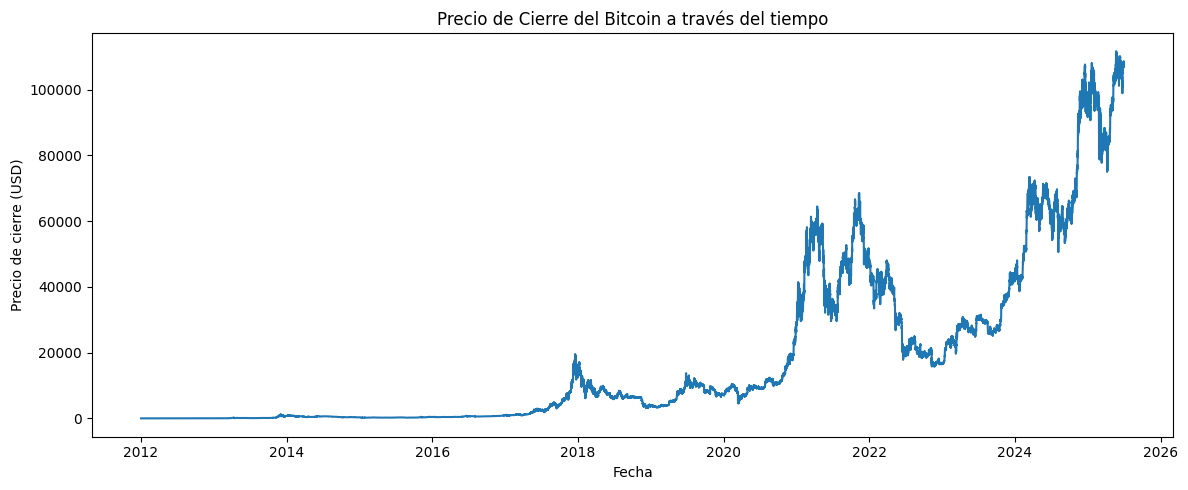

In [62]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_horario, x=df_horario.index, y="Close")

plt.title("Precio de Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.tight_layout()
plt.show()